In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import tweepy
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#script_path = os.path.dirname(os.path.abspath(__file__))
keysFile = open(("keys.txt"), "r")
keys = keysFile.read().splitlines()
keysFile.close()
CONSUMER_KEY = keys[0]
CONSUMER_SECRET = keys[1]
ACCESS_TOKEN = keys[2]
ACCESS_TOKEN_SECRET = keys[3]

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [15]:
data = pd.read_csv("my_csv.csv")
data.timestamp = pd.to_datetime(data.timestamp)
def localizeConvert(x):
    x = x.tz_localize('GMT')
    x = x.tz_convert('US/Central')
    return x
data.timestamp = data.timestamp.apply(lambda x: localizeConvert(x))
data.index = data.timestamp
data.drop(columns=['Unnamed: 0','timestamp'],axis=1, inplace=True)

In [16]:
dat = pd.read_csv("my_csv.csv")
dat

,Unnamed: 0,user,normal,retweeted,quoted,favorited,id,timestamp
0,0,Plugin Deals,True,False,False,False,1037792811192672256,2018-09-06 20:01:02
1,1,Anime News Network,True,False,False,False,1037792816884330502,2018-09-06 20:01:03
2,2,Plugin Deals,True,False,False,False,1037793064482422785,2018-09-06 20:02:02
3,3,Siraj Raval,True,False,False,False,1037795276734394368,2018-09-06 20:10:49
4,4,The Kansas City Star,True,False,False,False,1037795473669726210,2018-09-06 20:11:36
5,5,Crunchyroll,False,True,False,False,1037796413659172866,2018-09-06 20:15:20
6,6,The Kansas City Star,True,False,False,False,1037796586108215303,2018-09-06 20:16:02
7,7,Bandeauxx.,False,True,True,False,1037797375476158465,2018-09-06 20:19:10
8,8,The Kansas City Star,True,False,False,False,1037797498880962560,2018-09-06 20:19:39
9,9,NO MANA,False,True,True,False,1037797763860246528,2018-09-06 20:20:42


In [17]:
data

,user,normal,retweeted,quoted,favorited,id
timestamp,,,,,,
2018-09-06 15:01:02-05:00,Plugin Deals,True,False,False,False,1037792811192672256
2018-09-06 15:01:03-05:00,Anime News Network,True,False,False,False,1037792816884330502
2018-09-06 15:02:02-05:00,Plugin Deals,True,False,False,False,1037793064482422785
2018-09-06 15:10:49-05:00,Siraj Raval,True,False,False,False,1037795276734394368
2018-09-06 15:11:36-05:00,The Kansas City Star,True,False,False,False,1037795473669726210
2018-09-06 15:15:20-05:00,Crunchyroll,False,True,False,False,1037796413659172866
2018-09-06 15:16:02-05:00,The Kansas City Star,True,False,False,False,1037796586108215303
2018-09-06 15:19:10-05:00,Bandeauxx.,False,True,True,False,1037797375476158465
2018-09-06 15:19:39-05:00,The Kansas City Star,True,False,False,False,1037797498880962560


In [22]:
currentPage = -1
friendsList = []
while currentPage != 0:
    pagedList = api.friends(cursor=currentPage)
    currentPage = pagedList[-1][1]
    for x in pagedList:
        for k in x:
            if type(k) is not long and type(k) is not int:
                friendsList.append(k.name)

temp = pd.DataFrame({'Count' : [len(friendsList), len(data['user'].unique())],
                     'V1' : ['FollowersTotal','FollowersTweeted']})
temp.index = temp['V1']



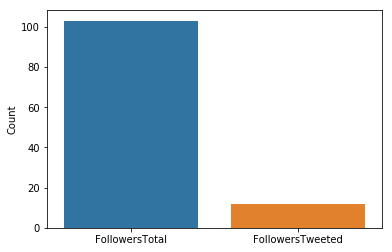

In [23]:
ax = sb.barplot(y='Count',x='V1',data=temp)
ax.set_xlabel('')
plt.show()

In [24]:
list(set(friendsList) - set(data.user.unique()))

[u'Ark Patrol',
 u'AudioThing',
 u'Rush Garcia',
 u'Maurice  Brown',
 u'sofia',
 u'ReaperDAW',
 u'Meli',
 u'raggs',
 u'Ken S',
 u'Seen.',
 u'baerit',
 u'Jon Hopkins',
 u'Sideways',
 u'Scotty Does Know',
 u'Cockos Incorporated',
 u'Adam Neely',
 u'Amelia Crowe',
 u'Downtown KC \U0001f6b8 \U0001f6b2 \U0001f6f4 \U0001f68a \U0001f68c Advocate',
 u'Kansas City, MO',
 u'respect women',
 u'brasstracks',
 u'KCMO Public Library',
 u'Spitfire Audio',
 u'Reaper Zone',
 u'Dayman',
 u'ill-esha',
 u'MMBN Chrono X',
 u'miho 3tos',
 u'phippo',
 u'Nathaniel Wyvern',
 u'Focusrite',
 u'Artist Intel. Agency',
 u'SLAVIATHAN',
 u'North Kansas City',
 u'Future Music',
 u'Joel Murphy | b4shful',
 u'Heroes of the Storm',
 u'VEVA Sound',
 u'Westport Kansas City',
 u'MyAnimeList',
 u'Kansas City Police',
 u'quo',
 u'Mir\U0001f339',
 u'Funimation',
 u'JunkWub',
 u'twiddy',
 u'Black Rooster Audio',
 u'Lost Dogz',
 u'Computer Music',
 u'Calvin and Hobbes',
 u'Mr. Kilian',
 u'Tom Holkenborg',
 u'12tone',
 u'EDMP Dis

                      normal  retweeted  quoted  favorited  total
user                                                             
Anime News Network         2          0       0          0      2
Bandeauxx.                 0          6       2          0      8
Crunchyroll                2          1       0          0      3
KVR Audio                  1          0       0          0      1
Mega Man                   1          0       1          0      2
NO MANA                    0          1       1          0      2
Native Instruments         0          1       0          0      1
Phuture Collective         1          0       0          0      1
Plugin Deals               6          0       0          0      6
Siraj Raval                1          0       0          0      1
The Kansas City Star       4          0       0          0      4
[adult swim]               2          0       0          0      2


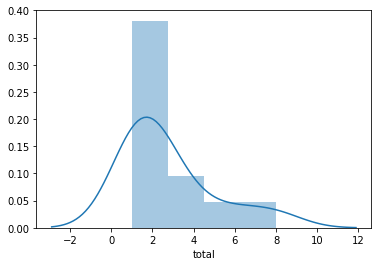

In [26]:
total = data.groupby('user')[data.columns[1:-1]].apply(lambda x: x.sum())

total['total'] = total.sum(axis=1)
print total
total.sort_values(by='total',ascending=False, inplace=True)
sb.distplot(total['total'])

In [8]:
temp = pd.read_csv('my_csv.csv')
#sb.factorplot('timestamp', data=temp.normal)

In [9]:
temp[temp['normal'] is True]

KeyError: False

In [10]:
temp.normal.unique()

array([False])

In [11]:

data.normal.unique()

array([False])

In [17]:
data.tail(20)

,user,retweeted,favorited,quoted,normal,id
timestamp,,,,,,
2018-07-16 07:44:48-05:00,The Kansas City Star,False,True,False,False,1018838862997737472
2018-07-16 07:46:25-05:00,sofia,False,True,True,False,1018839270516129792
2018-07-16 07:51:56-05:00,Adam Neely,True,False,False,False,1018840658944102403
2018-07-16 08:06:01-05:00,Plugin Deals,True,False,False,False,1018844202602582016
2018-07-16 08:09:40-05:00,Calvin and Hobbes,True,False,False,False,1018845118709760001
2018-07-16 08:21:38-05:00,Kansas City Police,True,False,False,False,1018848130513756160
2018-07-16 08:26:02-05:00,The Kansas City Star,True,False,False,False,1018849239097626626
2018-07-16 08:30:03-05:00,Anime News Network,True,False,False,False,1018850249719328770
2018-07-16 08:37:39-05:00,The Kansas City Star,False,True,False,False,1018852163274133507
